<a href="https://colab.research.google.com/github/Yassmina-Abdo/unsupervised_learning/blob/main/clustering_comparion_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
!pip install plotnine --user
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, fcluster

%matplotlib inline

# Methods

In [ ]:
def kmeans_elbow(df):
  ks = range(1, 15)
  inertias = []

  for k in ks:
      model = KMeans(n_clusters=k)
      model.fit(df)
      inertias.append(model.inertia_)
      
  # Plot ks vs inertias
  plt.plot(ks, inertias, '-o')
  plt.xlabel('number of clusters, k')
  plt.ylabel('inertia')
  plt.xticks(ks)
  plt.show()

def k_means(reduced_df,k):

  kmeans_df=reduced_df.copy()
  kmeans_cls = KMeans(n_clusters=k)
  kmeans_cls.fit(kmeans_df)
  kmeans_df['labels'] =kmeans_cls.labels_
  #test
  print("Silhouette Coefficient of Kmeans Clustering: %0.3f"  % silhouette_score(kmeans_df, kmeans_cls.labels_))
  sns.scatterplot(kmeans_df.iloc[:,0],kmeans_df.iloc[:,1],hue='labels',data=kmeans_df)
  plt.show()
#.....................................................................................................................
def Draw_dendogram(df):
  distance_matrix = linkage(df,method='complete',metric='euclidean')
  plt.figure(figsize=(10, 7))  
  plt.title("Dendrograms") 
  _=dendrogram(distance_matrix)
  return distance_matrix

def Hierarchical(df,distances,n_clusters):
  hier_df =df.copy()
  hier_df['labels'] = fcluster(distances, n_clusters, criterion='maxclust')

  #test
  print("Silhouette Coefficient of hierarchical Clustering: %0.3f"  % silhouette_score(hier_df, hier_df['labels']))
  sns.scatterplot(hier_df.iloc[:,0],hier_df.iloc[:,1],hue='labels',data=hier_df)
  plt.show() 
#.....................................................................................................................

def K_neighbor(df):
  neigh = NearestNeighbors(n_neighbors=2)
  nbrs = neigh.fit(df)
  distances, indices = nbrs.kneighbors(df)

  distances = np.sort(distances, axis=0)
  distances = distances[:,1]
  plt.plot(distances)
  plt.title('K-distance Graph',fontsize=20)
  plt.xlabel('Data Points sorted by distance',fontsize=14)
  plt.ylabel('Epsilon',fontsize=14)
  plt.show()


def Find_minsamples(df,eps):
  samples=[3,4,5,6,7,8,9,10]
  for i in samples:
    db_df =df.copy()
    db_cls = DBSCAN(eps=eps,min_samples=i).fit(df)
    db_df['labels']=db_cls.labels_ 
    #test
    print(" For no of samples= "+str(i)+"--->Silhouette Coefficient of DBSCAN Clustering: %0.3f"  % silhouette_score(db_df,  db_df['labels']))

def dbscan(df,eps,min_samples):
  db_df =df.copy()
  db_cls = DBSCAN(eps=eps,min_samples=min_samples).fit(df)
  db_df['labels']=db_cls.labels_ 
  #test
  print("Silhouette Coefficient of DBSCAN Clustering: %0.3f"  % silhouette_score(db_df,  db_df['labels']))
  sns.scatterplot(db_df.iloc[:,0],db_df.iloc[:,1],hue='labels',data=db_df)
  plt.show()

#.....................................................................................................................

def Find_k_gmm(df):
  n_range = range(3,15)
  bic_score = []
  aic_score = []
  for n in n_range:
      gm = GaussianMixture(n_components=n,random_state=123, n_init=15).fit(df)
      
      bic_score.append(gm.bic(df))
      aic_score.append(gm.aic(df))

  fig, ax = plt.subplots(figsize=(12,8),nrows=1)
  ax.plot(n_range, bic_score, '-o', color='orange')
  ax.plot(n_range, aic_score, '-o', color='green')
  ax.set(xlabel='Number of Clusters', ylabel='Score')
  ax.set_xticks(n_range)    

 
def gmm(df,n_components):
  gmm_df=df.copy()
  gmm = GaussianMixture(n_components=n_components).fit(gmm_df)
  labels = gmm.predict(gmm_df)
  gmm_df['labels'] = labels
  print("Silhouette Coefficient of GMM Clustering: %0.3f"  % silhouette_score(gmm_df, gmm_df['labels']))
  sns.scatterplot(gmm_df.iloc[:,0],gmm_df.iloc[:,1],hue='labels',data=gmm_df)
  plt.show()
#.....................................................................................................................


# Data Sets

># DataSet 1

>## Read Data

In [ ]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

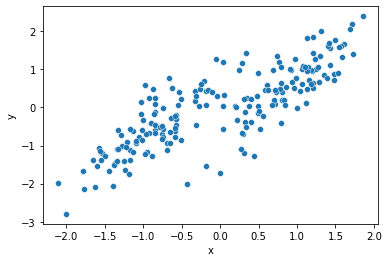

In [ ]:
sns.scatterplot(data=d1,x='x',y='y')

>## 1. Kmeans

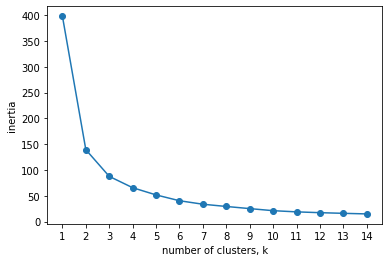

In [ ]:
kmeans_elbow(d1)

Silhouette Coefficient of Kmeans Clustering: 0.721


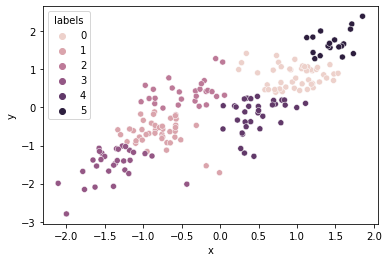

In [ ]:
k_means(d1,6)

>## 2. Hierarchical

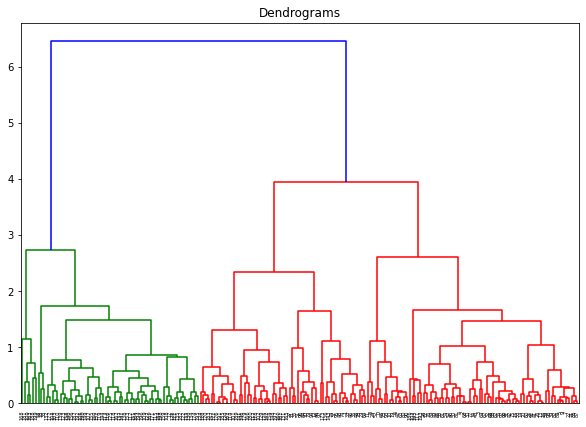

In [ ]:
distance_matrix1=Draw_dendogram(d1)

Silhouette Coefficient of hierarchical Clustering: 0.596


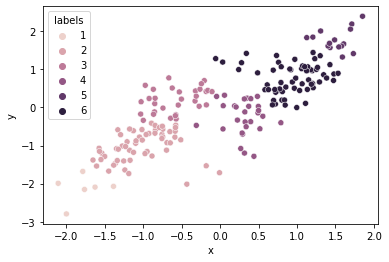

In [ ]:
Hierarchical(d1,distance_matrix1,6)

>## 3. DBSCAN

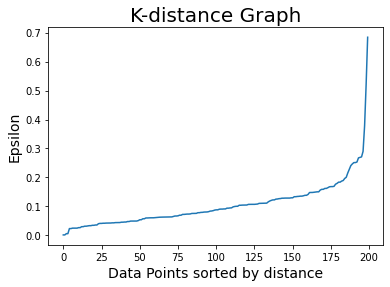

In [ ]:
K_neighbor(d1)

In [ ]:
Find_minsamples(d1,eps=0.2)

 For no of samples= 3--->Silhouette Coefficient of DBSCAN Clustering: 0.621
 For no of samples= 4--->Silhouette Coefficient of DBSCAN Clustering: 0.559
 For no of samples= 5--->Silhouette Coefficient of DBSCAN Clustering: 0.514
 For no of samples= 6--->Silhouette Coefficient of DBSCAN Clustering: 0.477
 For no of samples= 7--->Silhouette Coefficient of DBSCAN Clustering: 0.429
 For no of samples= 8--->Silhouette Coefficient of DBSCAN Clustering: 0.354
 For no of samples= 9--->Silhouette Coefficient of DBSCAN Clustering: 0.256
 For no of samples= 10--->Silhouette Coefficient of DBSCAN Clustering: 0.237


Silhouette Coefficient of DBSCAN Clustering: 0.621


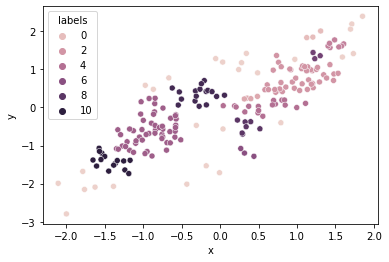

In [ ]:
dbscan(d1,eps=0.2,min_samples=3)

>## 4. GMM

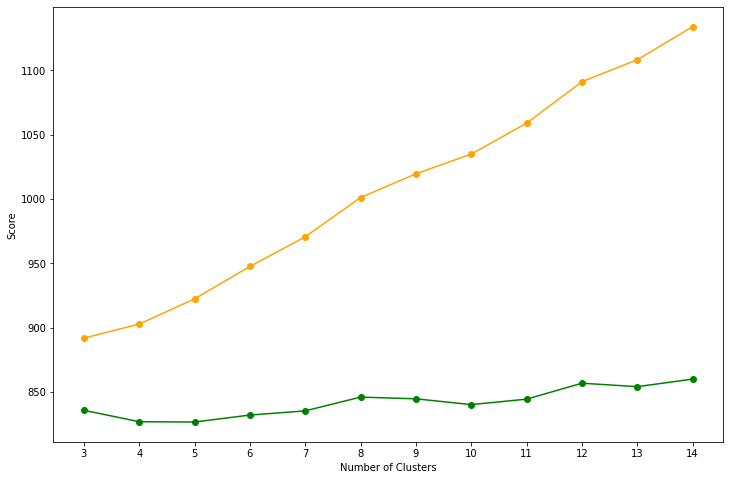

In [ ]:
Find_k_gmm(d1)

Silhouette Coefficient of GMM Clustering: 0.527


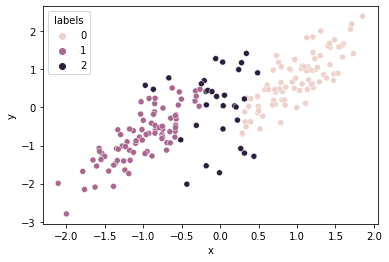

In [ ]:
gmm(d1,n_components=3)

># Dataset 2

>## Read Data

In [ ]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")

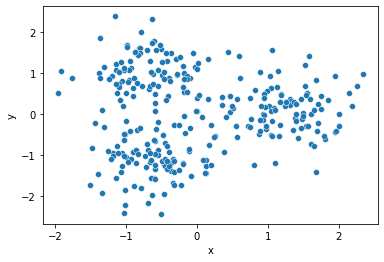

In [ ]:
sns.scatterplot(data=d2,x='x',y='y')

>## 1. Kmeans

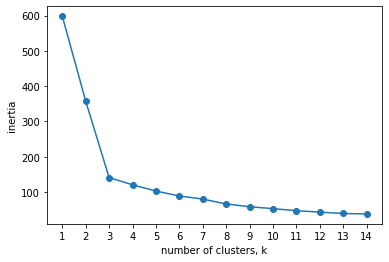

In [ ]:
kmeans_elbow(d2)

Silhouette Coefficient of Kmeans Clustering: 0.708


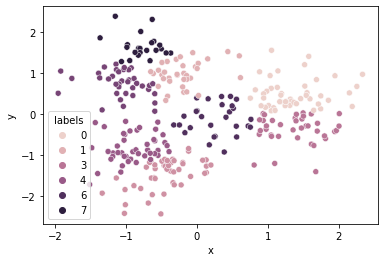

In [ ]:
k_means(d2,8)

>## 2. Hierarchical

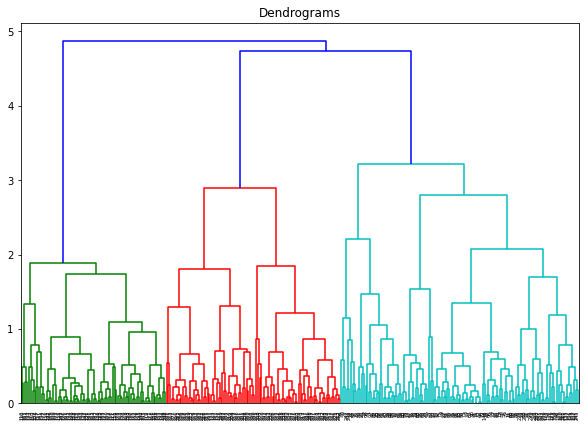

In [ ]:
distance_matrix2=Draw_dendogram(d2)

Silhouette Coefficient of hierarchical Clustering: 0.584


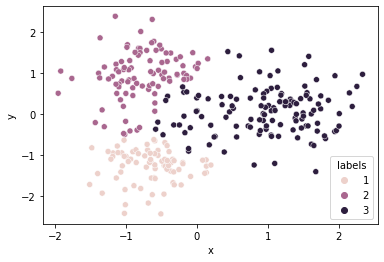

In [ ]:
Hierarchical(d2,distance_matrix2,3)

>## 3. DBSCAN

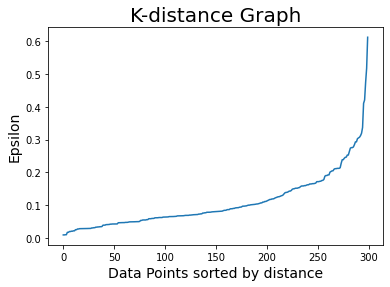

In [ ]:
K_neighbor(d2)

In [ ]:
Find_minsamples(d2,eps=0.25)

 For no of samples= 3--->Silhouette Coefficient of DBSCAN Clustering: 0.244
 For no of samples= 4--->Silhouette Coefficient of DBSCAN Clustering: 0.374
 For no of samples= 5--->Silhouette Coefficient of DBSCAN Clustering: 0.360
 For no of samples= 6--->Silhouette Coefficient of DBSCAN Clustering: 0.499
 For no of samples= 7--->Silhouette Coefficient of DBSCAN Clustering: 0.463
 For no of samples= 8--->Silhouette Coefficient of DBSCAN Clustering: 0.493
 For no of samples= 9--->Silhouette Coefficient of DBSCAN Clustering: 0.475
 For no of samples= 10--->Silhouette Coefficient of DBSCAN Clustering: 0.451


Silhouette Coefficient of DBSCAN Clustering: 0.499


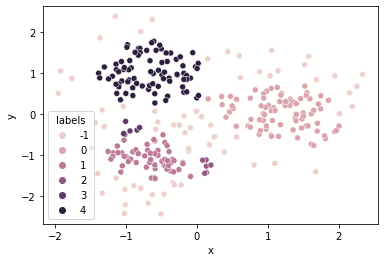

In [ ]:
dbscan(d2,eps=0.25,min_samples=6)

>## 4. GMM

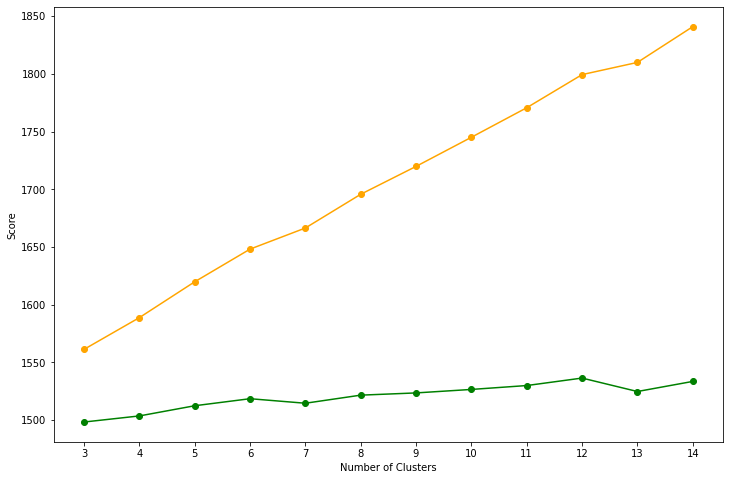

In [ ]:
Find_k_gmm(d2)

Silhouette Coefficient of GMM Clustering: 0.633


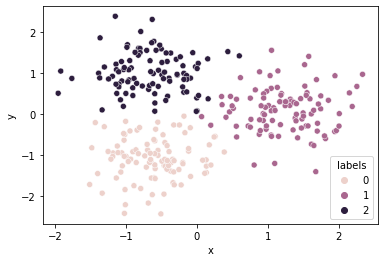

In [ ]:
gmm(d2,n_components=3)

># Dataset 3

>## Read Data

In [ ]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")

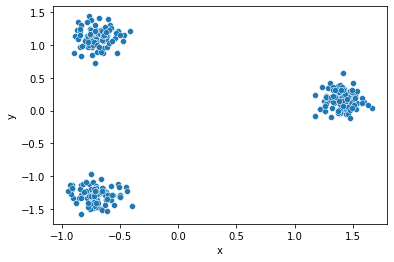

In [ ]:
sns.scatterplot(data=d3,x='x',y='y')

>## 1. Kmeans

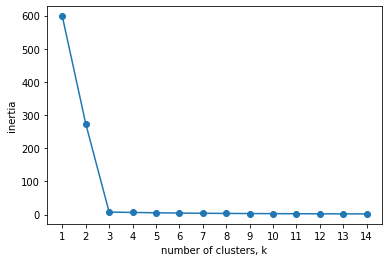

In [ ]:
kmeans_elbow(d3)

Silhouette Coefficient of Kmeans Clustering: 0.924


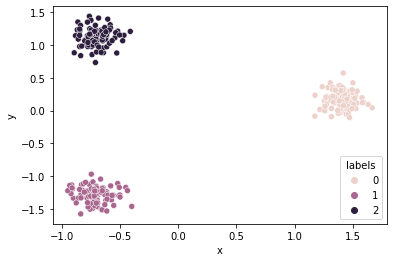

In [ ]:
k_means(d3,3)

>## 2. Hierarchical

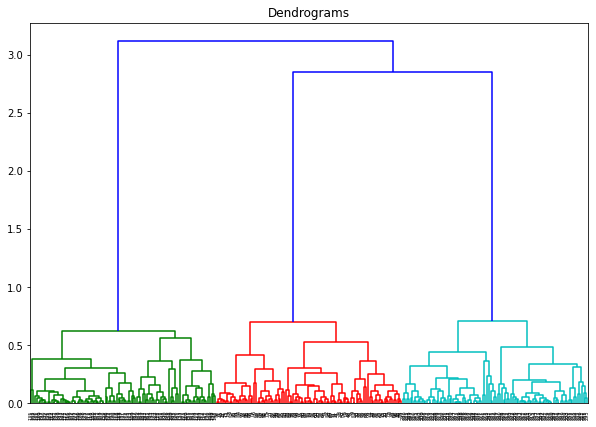

In [ ]:
distance_matrix3=Draw_dendogram(d3)

Silhouette Coefficient of hierarchical Clustering: 0.922


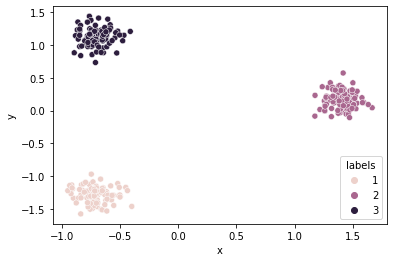

In [ ]:
Hierarchical(d3,distance_matrix3,3)

>## 3. DBSCAN

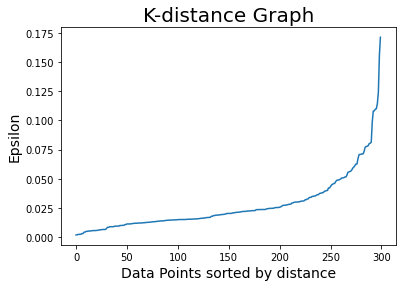

In [ ]:
K_neighbor(d3)

In [ ]:
Find_minsamples(d3,eps=0.050)

 For no of samples= 3--->Silhouette Coefficient of DBSCAN Clustering: 0.764
 For no of samples= 4--->Silhouette Coefficient of DBSCAN Clustering: 0.688
 For no of samples= 5--->Silhouette Coefficient of DBSCAN Clustering: 0.676
 For no of samples= 6--->Silhouette Coefficient of DBSCAN Clustering: 0.649
 For no of samples= 7--->Silhouette Coefficient of DBSCAN Clustering: 0.567
 For no of samples= 8--->Silhouette Coefficient of DBSCAN Clustering: 0.475
 For no of samples= 9--->Silhouette Coefficient of DBSCAN Clustering: 0.445
 For no of samples= 10--->Silhouette Coefficient of DBSCAN Clustering: 0.321


Silhouette Coefficient of DBSCAN Clustering: 0.764


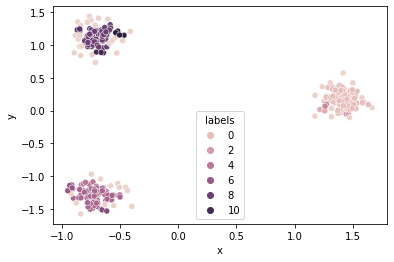

In [ ]:
dbscan(d3,eps=0.050,min_samples=3)

>## 4. GMM

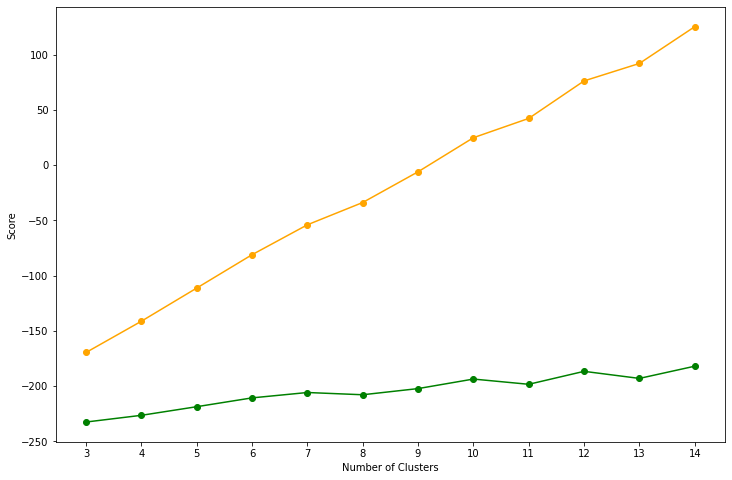

In [ ]:
Find_k_gmm(d3)

Silhouette Coefficient of GMM Clustering: 0.922


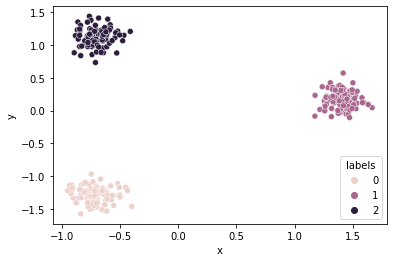

In [ ]:
gmm(d3,n_components=3)

># Dataset 4

>## Read Data

In [ ]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")

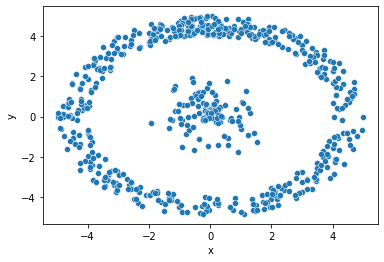

In [ ]:
sns.scatterplot(data=d4,x='x',y='y')

>## 1. Kmeans

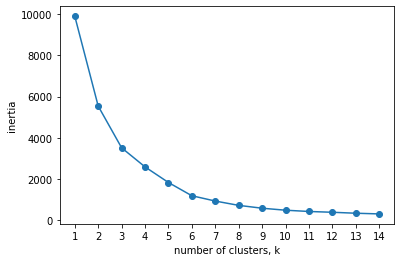

In [ ]:
kmeans_elbow(d4)

Silhouette Coefficient of Kmeans Clustering: 0.713


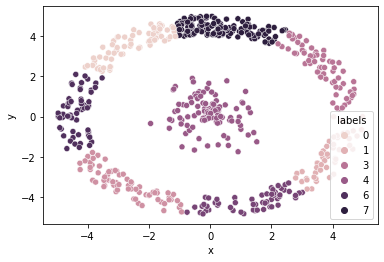

In [ ]:
k_means(d4,8)

>## 2. Hierarchical

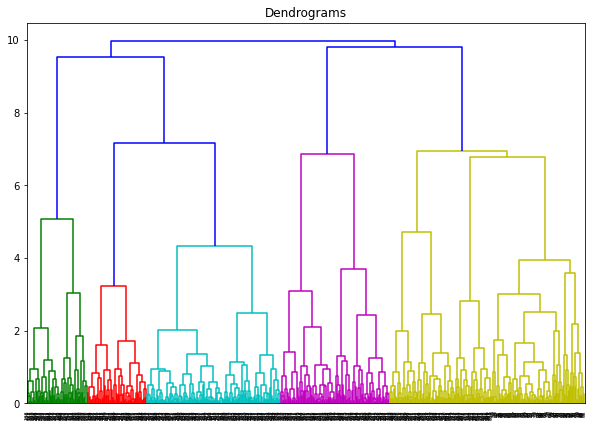

In [ ]:
distance_matrix4=Draw_dendogram(d4)

Silhouette Coefficient of hierarchical Clustering: 0.594


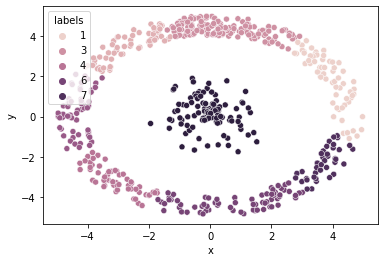

In [ ]:
Hierarchical(d4,distance_matrix4,8)

>## 3. DBSCAN

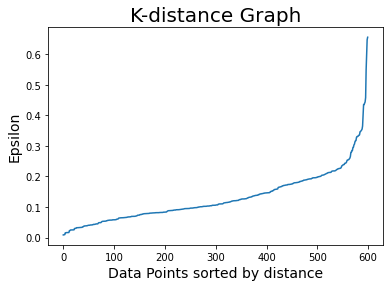

In [ ]:
K_neighbor(d4)

In [ ]:
Find_minsamples(d4,eps=0.2)

 For no of samples= 3--->Silhouette Coefficient of DBSCAN Clustering: 0.506
 For no of samples= 4--->Silhouette Coefficient of DBSCAN Clustering: 0.310
 For no of samples= 5--->Silhouette Coefficient of DBSCAN Clustering: 0.141
 For no of samples= 6--->Silhouette Coefficient of DBSCAN Clustering: 0.080
 For no of samples= 7--->Silhouette Coefficient of DBSCAN Clustering: -0.067
 For no of samples= 8--->Silhouette Coefficient of DBSCAN Clustering: -0.080
 For no of samples= 9--->Silhouette Coefficient of DBSCAN Clustering: -0.041
 For no of samples= 10--->Silhouette Coefficient of DBSCAN Clustering: -0.073


Silhouette Coefficient of DBSCAN Clustering: 0.506


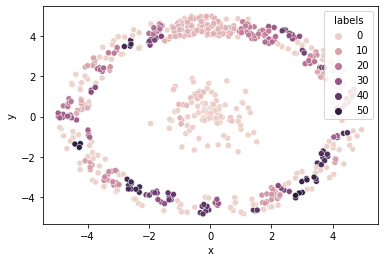

In [ ]:
dbscan(d4,eps=0.2,min_samples=3)

>## 4. GMM

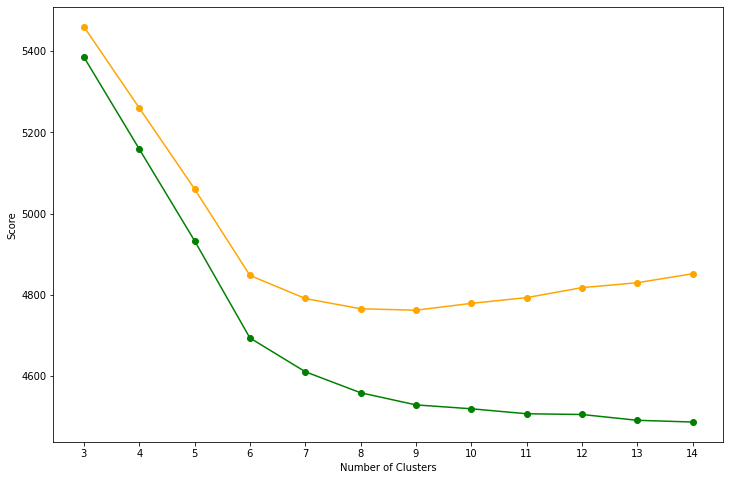

In [ ]:
Find_k_gmm(d4)

Silhouette Coefficient of GMM Clustering: 0.724


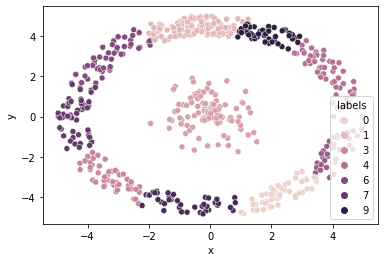

In [ ]:
gmm(d4,n_components=10)

># Dataset 5

>## Read Data

In [ ]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")

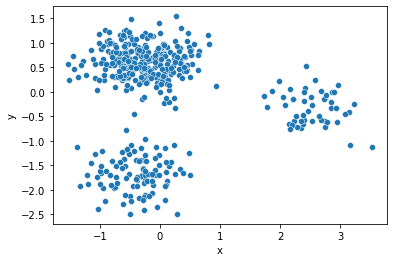

In [ ]:
sns.scatterplot(data=d5,x='x',y='y')

>## 1. Kmeans

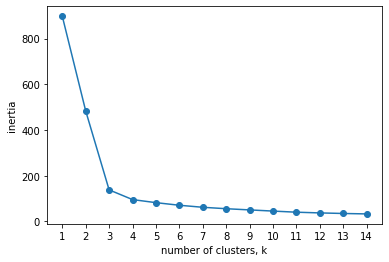

In [ ]:
kmeans_elbow(d5)

Silhouette Coefficient of Kmeans Clustering: 0.732


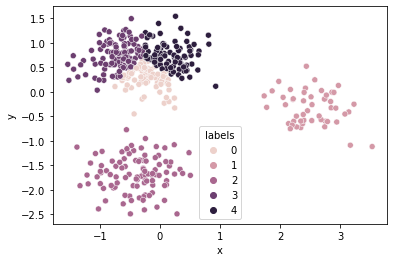

In [ ]:
k_means(d5,5)

>## 2. Hierarchical

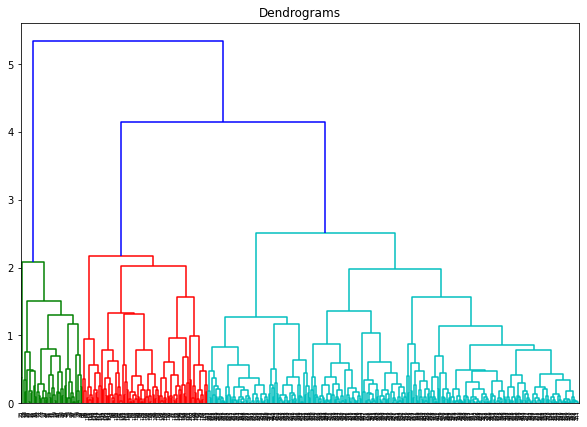

In [ ]:
distance_matrix5=Draw_dendogram(d5)

Silhouette Coefficient of hierarchical Clustering: 0.733


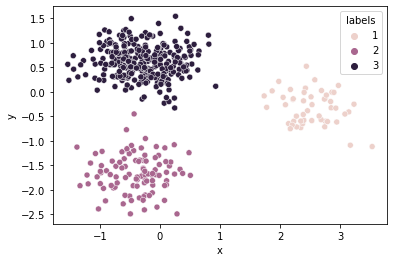

In [ ]:
Hierarchical(d5,distance_matrix5,3)

>## 3. DBSCAN

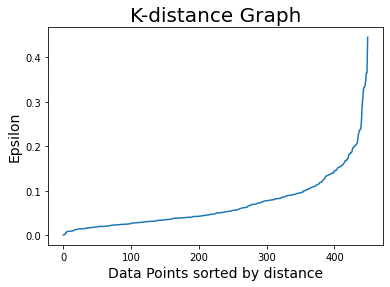

In [ ]:
K_neighbor(d5)

In [ ]:
Find_minsamples(d5,eps=0.1)

 For no of samples= 3--->Silhouette Coefficient of DBSCAN Clustering: 0.482
 For no of samples= 4--->Silhouette Coefficient of DBSCAN Clustering: 0.444
 For no of samples= 5--->Silhouette Coefficient of DBSCAN Clustering: 0.349
 For no of samples= 6--->Silhouette Coefficient of DBSCAN Clustering: 0.271
 For no of samples= 7--->Silhouette Coefficient of DBSCAN Clustering: 0.336
 For no of samples= 8--->Silhouette Coefficient of DBSCAN Clustering: 0.271
 For no of samples= 9--->Silhouette Coefficient of DBSCAN Clustering: 0.259
 For no of samples= 10--->Silhouette Coefficient of DBSCAN Clustering: 0.197


Silhouette Coefficient of DBSCAN Clustering: 0.482


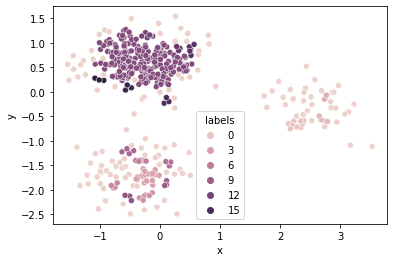

In [ ]:
dbscan(d5,eps=0.1,min_samples=3)

>## 4. GMM

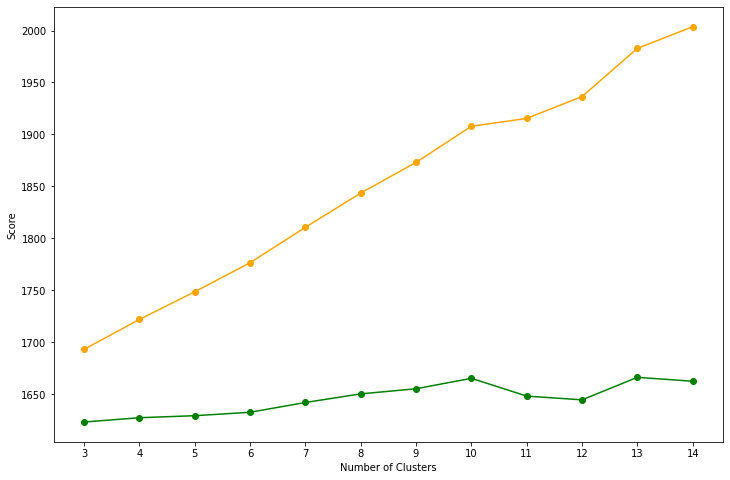

In [ ]:
Find_k_gmm(d5)

Silhouette Coefficient of GMM Clustering: 0.734


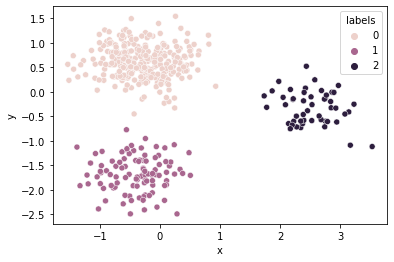

In [ ]:
gmm(d5,n_components=3)

># Dataset 6

>## Read Data

In [ ]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")


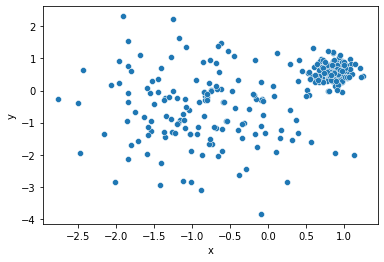

In [ ]:
sns.scatterplot(data=d6,x='x',y='y')

>## 1. Kmeans

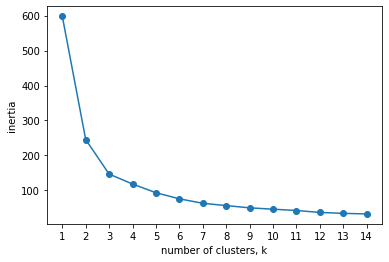

In [ ]:
kmeans_elbow(d6)

Silhouette Coefficient of Kmeans Clustering: 0.723


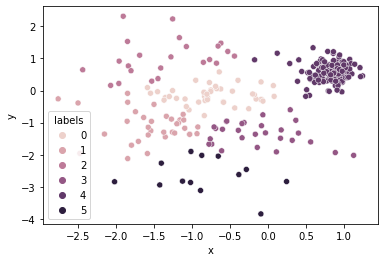

In [ ]:
k_means(d6,6)

>## 2. Hierarchical

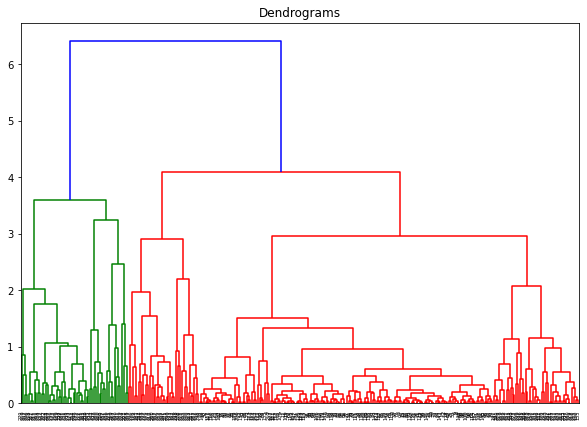

In [ ]:
distance_matrix6=Draw_dendogram(d6)

Silhouette Coefficient of hierarchical Clustering: 0.576


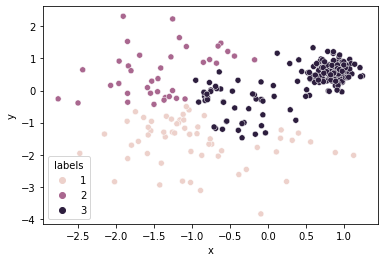

In [ ]:
Hierarchical(d6,distance_matrix6,3)

>## 3. DBSCAN

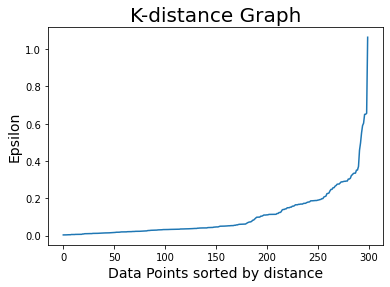

In [ ]:
K_neighbor(d6)

In [ ]:
Find_minsamples(d6,eps=0.3)

 For no of samples= 3--->Silhouette Coefficient of DBSCAN Clustering: 0.639
 For no of samples= 4--->Silhouette Coefficient of DBSCAN Clustering: 0.599
 For no of samples= 5--->Silhouette Coefficient of DBSCAN Clustering: 0.563
 For no of samples= 6--->Silhouette Coefficient of DBSCAN Clustering: 0.603
 For no of samples= 7--->Silhouette Coefficient of DBSCAN Clustering: 0.593
 For no of samples= 8--->Silhouette Coefficient of DBSCAN Clustering: 0.607
 For no of samples= 9--->Silhouette Coefficient of DBSCAN Clustering: 0.588
 For no of samples= 10--->Silhouette Coefficient of DBSCAN Clustering: 0.585


Silhouette Coefficient of DBSCAN Clustering: 0.639


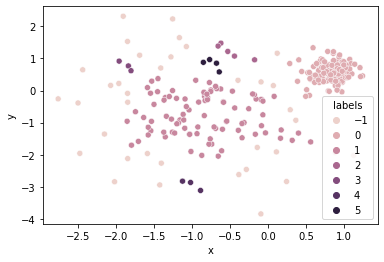

In [ ]:
dbscan(d6,eps=0.3,min_samples=3)

>## 4. GMM

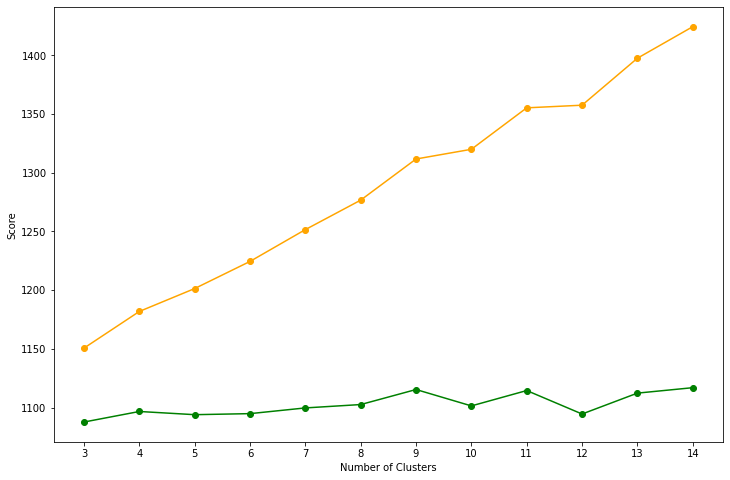

In [ ]:
Find_k_gmm(d6)

Silhouette Coefficient of GMM Clustering: 0.631


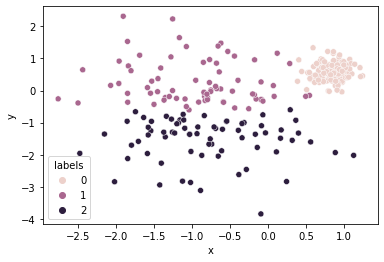

In [ ]:
gmm(d6,n_components=3)